In [1]:
import import_ipynb
import player as P
import pygame
import sys
import time

pygame 2.6.1 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


## PLAY AGAINST

In [2]:
def playoff(bot_white,bot_black):
    WIDTH, HEIGHT = 600, 600
    GRID_SIZE = 8
    CELL_SIZE = WIDTH // GRID_SIZE
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 128, 0)
    # Initialize the game board
    board = [[0 for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]
    board[3][4] = board[4][3] = 2  # White
    board[3][3] = board[4][4] = 1  # Black
    # Current player (1 for White, 2 for Black)
   

    flag = 1
    current_player = 2
    while flag:
        
        flag = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if P.is_valid_move(x,y,board,current_player): flag=1

        if current_player == 1 and flag:
            x,y = bot_white.get_move(board,current_player)    
            if P.is_valid_move(x, y,board,current_player):
                P.make_move(x,y,board,current_player)
            current_player = 2
        
        elif current_player == 2 and flag:
            
            grid_x,grid_y = bot_black.get_move(board,current_player)
            if P.is_valid_move(grid_x, grid_y,board,current_player):
                P.make_move(grid_x, grid_y,board,current_player)
                current_player = 1


        if not flag:
            wins = P.decide_winner(board,current_player)
    return wins



In [3]:
def match(idxWhite,idxBlack):
    global elo
    global players
    E_w = 1/(1 + 10**((elo[idxBlack] - elo[idxWhite])/400))
    E_b = 1/(1 + 10**((elo[idxWhite] - elo[idxBlack])/400))

    blackWin = playoff(bot_white = players[idxWhite],bot_black = players[idxBlack])

    if(blackWin):
        elo[idxBlack] = elo[idxBlack] + 32*(1 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(0 - E_b)
    else:
        elo[idxBlack] = elo[idxBlack] + 32*(0 - E_w)
        elo[idxWhite] = elo[idxWhite] + 32*(1 - E_b)

## MCTS

In [4]:
import matplotlib.pyplot as plt

3
......[1161.2871705887262, 1203.0050780244044, 1235.7077513868694]
......[1150.5349281811857, 1132.6609464857063, 1316.804125333108]
......[1099.6137114997664, 1117.2124109447539, 1383.1738775554797]


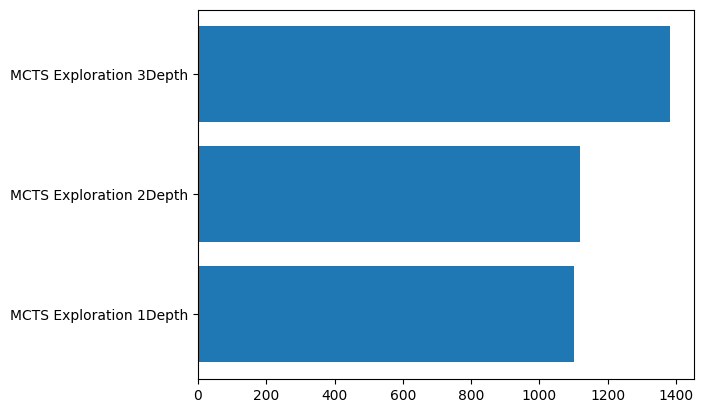

In [5]:
mcts1 = P.MCTSPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=1)
mcts2 = P.MCTSPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=2)
mcts3 = P.MCTSPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=3)

players = [mcts1,mcts2,mcts3]
elo = [1200 for x in players]


n = len(elo)
print(n)
for x in range(3):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

plt.barh([
     "MCTS Exploration 1Depth",
     "MCTS Exploration 2Depth",
     "MCTS Exploration 3Depth",
     ],elo)

plt.show()

## Parrallel MCTS

3
......[1200.6220411903812, 1203.1434621103103, 1196.2344966993085]
......[1168.183836724053, 1167.4973853860783, 1264.3187778898687]
......[1158.0918590823014, 1197.3367016074553, 1244.5714393102432]


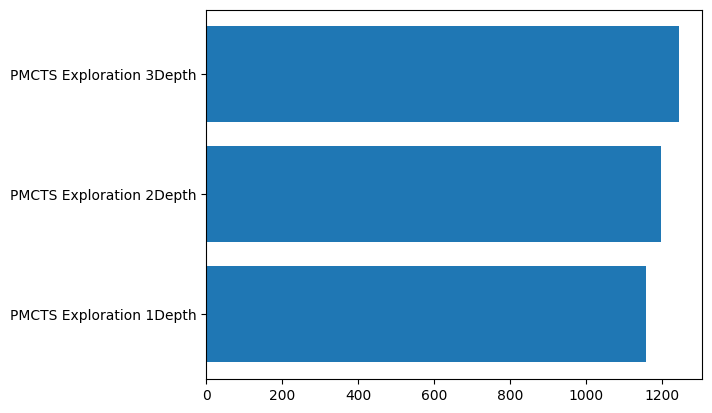

In [6]:
mcts1 = P.MCTSParallelPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=1)
mcts2 = P.MCTSParallelPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=2)
mcts3 = P.MCTSParallelPlayer(explorationFactor=1.4,timed = True,timeLimit = 1.5,selectionDepth=3)

players = [mcts1,mcts2,mcts3]
elo = [1200 for x in players]


n = len(elo)
print(n)
for x in range(3):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

plt.barh([
     "PMCTS Exploration 1Depth",
     "PMCTS Exploration 2Depth",
     "PMCTS Exploration 3Depth",
     ],elo)

plt.show()

5
....................[1251.9816452496643, 1276.0338727569026, 1202.8661428771936, 1152.701682932227, 1116.4166561840125]
....................[1359.96770736304, 1386.5137765297143, 1170.5232655484347, 1085.7796141385713, 997.2156364202398]
....................[1495.5961570486768, 1525.8427196184612, 1128.179154007179, 1036.0014852126083, 814.3804841130749]
....................[1714.9698051660744, 1611.9330791867367, 1041.850978181424, 986.3211732422624, 644.9249642235028]


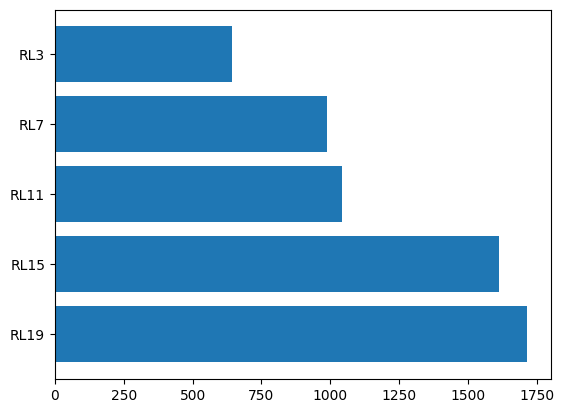

In [ ]:
import torch

RLMCTS19 = P.RLMCTSPlayer(timed = True,timeLimit = 1)
RLMCTS15 = P.RLMCTSPlayer(timed = True,timeLimit = 1)
RLMCTS11 = P.RLMCTSPlayer(timed = True,timeLimit = 1)
RLMCTS7 = P.RLMCTSPlayer(timed = True,timeLimit = 1)
RLMCTS3 = P.RLMCTSPlayer(timed = True,timeLimit = 1)

RLMCTS19.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint19.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS15.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint15.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS11.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint11.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS7.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint7.pth', map_location=torch.device("cpu"),weights_only=True))
RLMCTS3.policy_value_network.load_state_dict(torch.load('RLMCTS_5SEC_1.4/checkpoint3.pth', map_location=torch.device("cpu"),weights_only=True))



players = [RLMCTS19,RLMCTS15,RLMCTS11,RLMCTS7,RLMCTS3]
elo = [1200 for x in range(len(players))]

n = len(elo)
print(n)
for x in range(4):
    for i in range(n):
        for j in range(n):
            if i == j : continue
            match(i,j)
            print(".",end="")
    print(elo)

plt.barh([
     "20H",
     "16H",
     "12H",
     "8H",
     "4H"
     ],elo)

plt.show()





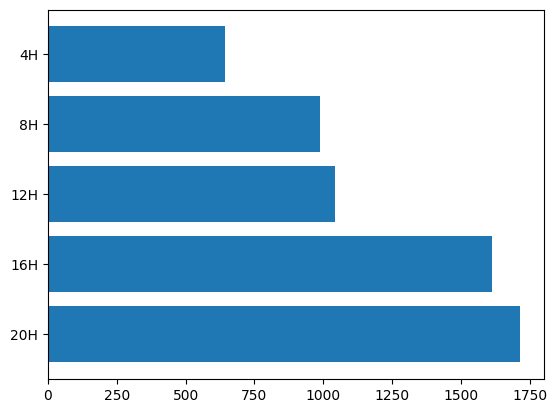

In [3]:
import matplotlib.pyplot as plt
elo = [1714.9698051660744, 1611.9330791867367, 1041.850978181424, 986.3211732422624, 644.9249642235028]
plt.barh([
     "20H",
     "16H",
     "12H",
     "8H",
     "4H"
     ],elo)

plt.show()